<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,74.942166,-0.014191,84.927975,84.944367,-0.016391
1,0.0,1.0,86.939029,0.027766,96.966796,96.938333,0.028462
2,0.0,2.0,45.999551,-0.114059,55.885492,56.008740,-0.123247
3,0.0,3.0,88.289070,0.034027,98.323097,98.288048,0.035049
4,0.0,4.0,48.590359,-0.038663,58.551696,58.598922,-0.047226
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.025931,0.036098,77.062029,77.018235,0.043794
29996,999.0,26.0,53.327132,0.009684,63.336816,63.313976,0.022840
29997,999.0,27.0,84.539132,-0.013972,94.525160,94.538415,-0.013256
29998,999.0,28.0,65.040144,-0.007951,75.032194,75.031657,0.000537


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,74.942166,-0.014191,84.927975,84.944367,-0.016391
1,0.0,1.0,86.939029,0.027766,96.966796,96.938333,0.028462
2,0.0,2.0,45.999551,-0.114059,55.885492,56.008740,-0.123247
3,0.0,3.0,88.289070,0.034027,98.323097,98.288048,0.035049
4,0.0,4.0,48.590359,-0.038663,58.551696,58.598922,-0.047226
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.025931,0.036098,77.062029,77.018235,0.043794
29996,999.0,26.0,53.327132,0.009684,63.336816,63.313976,0.022840
29997,999.0,27.0,84.539132,-0.013972,94.525160,94.538415,-0.013256
29998,999.0,28.0,65.040144,-0.007951,75.032194,75.031657,0.000537


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    74.942166 -0.014191  84.927975  84.944367 -0.016391
      1.0    86.939029  0.027766  96.966796  96.938333  0.028462
      2.0    45.999551 -0.114059  55.885492  56.008740 -0.123247
      3.0    88.289070  0.034027  98.323097  98.288048  0.035049
      4.0    48.590359 -0.038663  58.551696  58.598922 -0.047226
...                ...       ...        ...        ...       ...
999.0 25.0   67.025931  0.036098  77.062029  77.018235  0.043794
      26.0   53.327132  0.009684  63.336816  63.313976  0.022840
      27.0   84.539132 -0.013972  94.525160  94.538415 -0.013256
      28.0   65.040144 -0.007951  75.032194  75.031657  0.000537
      29.0   34.145361 -0.024107  44.121253  44.124560 -0.003306

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    74.942166 -0.014191  84.927975  84.944367 -0.016391
      1.0    86.939029  0.027766  96.966796  96.938333  0.028462
      2.0    45.999551 -0.114059  55.885492  56.008740 -0.123247
      3.0    88.289070  0.034027  98.323097  98.288048  0.035049
      4.0    48.590359 -0.038663  58.551696  58.598922 -0.047226
...                ...       ...        ...        ...       ...
999.0 25.0   67.025931  0.036098  77.062029  77.018235  0.043794
      26.0   53.327132  0.009684  63.336816  63.313976  0.022840
      27.0   84.539132 -0.013972  94.525160  94.538415 -0.013256
      28.0   65.040144 -0.007951  75.032194  75.031657  0.000537
      29.0   34.145361 -0.024107  44.121253  44.124560 -0.003306

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,74.942166,-0.014191,84.927975,84.944367,-0.016391
1,0.0,1.0,86.939029,0.027766,96.966796,96.938333,0.028462
2,0.0,2.0,45.999551,-0.114059,55.885492,56.008740,-0.123247
3,0.0,3.0,88.289070,0.034027,98.323097,98.288048,0.035049
4,0.0,4.0,48.590359,-0.038663,58.551696,58.598922,-0.047226
...,...,...,...,...,...,...,...
29995,999.0,25.0,67.025931,0.036098,77.062029,77.018235,0.043794
29996,999.0,26.0,53.327132,0.009684,63.336816,63.313976,0.022840
29997,999.0,27.0,84.539132,-0.013972,94.525160,94.538415,-0.013256
29998,999.0,28.0,65.040144,-0.007951,75.032194,75.031657,0.000537


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    74.942166 -0.014191  84.927975  84.944367 -0.016391
      1.0    86.939029  0.027766  96.966796  96.938333  0.028462
      2.0    45.999551 -0.114059  55.885492  56.008740 -0.123247
      3.0    88.289070  0.034027  98.323097  98.288048  0.035049
      4.0    48.590359 -0.038663  58.551696  58.598922 -0.047226
...                ...       ...        ...        ...       ...
999.0 25.0   67.025931  0.036098  77.062029  77.018235  0.043794
      26.0   53.327132  0.009684  63.336816  63.313976  0.022840
      27.0   84.539132 -0.013972  94.525160  94.538415 -0.013256
      28.0   65.040144 -0.007951  75.032194  75.031657  0.000537
      29.0   34.145361 -0.024107  44.121253  44.124560 -0.003306

[30000 rows x 5 columns]

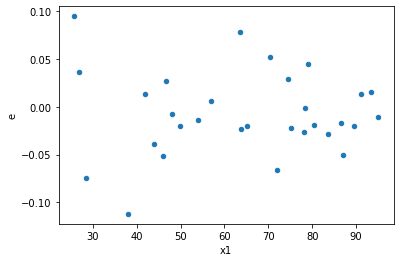

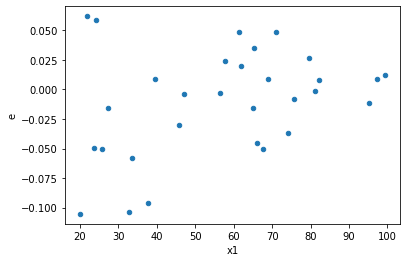

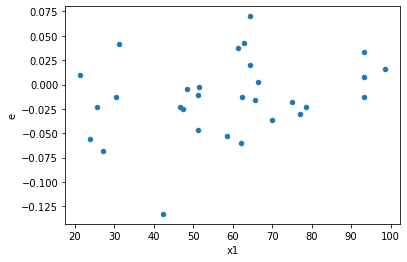

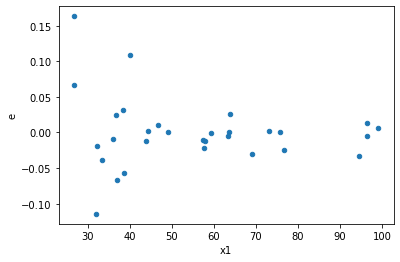

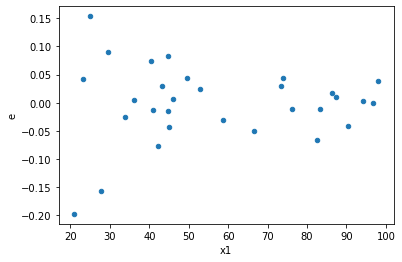

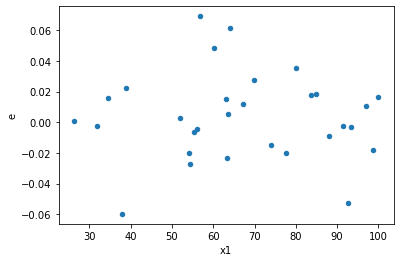

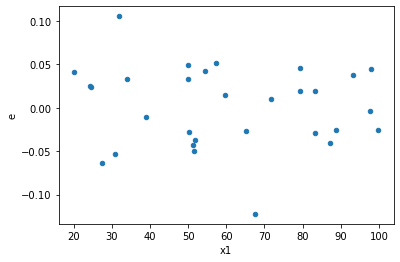

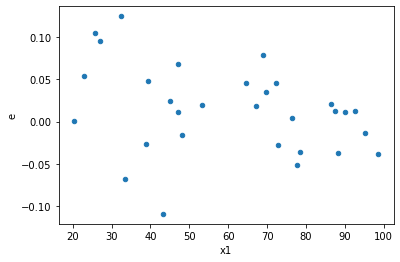

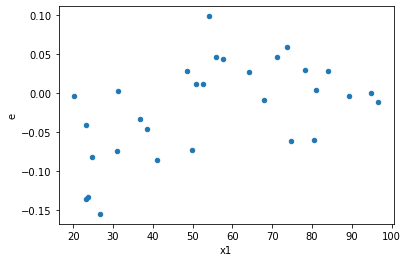

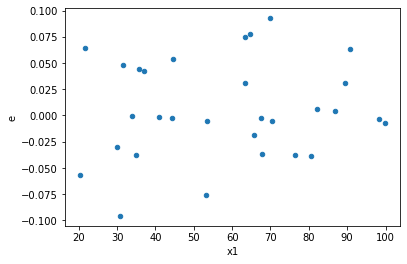

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,11.0,11.0,0.013708135737360563,0.01702382171297689,0.0012461941579418694,0.001547620155725172,1.2418772354711705,0.7257122711309845,0.6371438644345078,0.36285613556549223,Reject005=1 : Homoscedasticity
271.0,11.0,11.0,0.009193803301423806,0.009528987169933226,0.000835800300129437,0.0008662715609030206,1.0364575853452849,0.9537104130821115,0.5231447934589443,0.47685520654105573,Reject005=1 : Homoscedasticity
315.0,11.0,11.0,0.009945510073297897,0.012656923358788102,0.0009041372793907179,0.0011506293962534639,1.2726268703673547,0.6962710176123981,0.651864491193801,0.34813550880619903,Reject005=1 : Homoscedasticity
354.0,11.0,11.0,0.007462684593708823,0.008282069661815944,0.0006784258721553476,0.0007529154238014494,1.1097976281615702,0.865918517393689,0.5670407413031555,0.4329592586968445,Reject005=1 : Homoscedasticity
402.0,11.0,11.0,0.007596009412493456,0.008034858875074252,0.0006905463102266778,0.000730441715915841,1.0577736859908313,0.9274564795480078,0.5362717602259961,0.4637282397740039,Reject005=1 : Homoscedasticity
418.0,11.0,11.0,0.007905454917808903,0.008764429792574729,0.0007186777198008094,0.0007967663447795208,1.1086559703010617,0.8672302670956178,0.5663848664521911,0.4336151335478089,Reject005=1 : Homoscedasticity
495.0,11.0,11.0,0.00925893652461212,0.013867757652080526,0.0008417215022374654,0.0012607052410982297,1.4977700317112264,0.5139284024154871,0.7430357987922565,0.25696420120774355,Reject005=1 : Homoscedasticity
496.0,11.0,11.0,0.013963449691834051,0.01682791831089764,0.0012694045174394591,0.0015298107555361492,1.2051404690302825,0.76244094130021,0.618779529349895,0.381220470650105,Reject005=1 : Homoscedasticity
515.0,11.0,11.0,0.005959224312300611,0.011590029383287988,0.000541747664754601,0.0010536390348443625,1.944888927803014,0.28511885482805566,0.8574405725859722,0.14255942741402783,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,0.023280425062505897,0.0069746479929381645,0.002116402278409627,0.000634058908448924,0.2995928113087217,0.05736776881889987,Reject005=1 : Homoscedasticity
1.0,11.0,11.0,0.023333843418480833,0.012357891656461168,0.0021212584925891665,0.0011234446960419243,0.5296123503885987,0.30673067378885427,Reject005=1 : Homoscedasticity
2.0,11.0,11.0,0.02116071492006226,0.01051979247853497,0.0019237013563692964,0.0009563447707759063,0.4971378575003277,0.2618587525954627,Reject005=1 : Homoscedasticity
3.0,11.0,11.0,0.019987459896671538,0.011769084695950323,0.0018170418087883216,0.0010699167905409384,0.5888234301303188,0.39323921153652297,Reject005=1 : Homoscedasticity
4.0,11.0,11.0,0.04200480152689085,0.008651586826014386,0.003818618320626441,0.0007865078932740351,0.2059666159945017,0.014409145942616046,Reject005=0 : Heteroscedasticity
5.0,11.0,11.0,0.023963134617668802,0.0031717801209187073,0.0021784667834244364,0.0002883436473562461,0.1323608188796824,0.002254019472110494,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,0.013708135737360563,0.01702382171297689,0.0012461941579418694,0.001547620155725172,1.2418772354711705,0.7257122711309845,Reject005=1 : Homoscedasticity
7.0,11.0,11.0,0.06462920963241793,0.009177496675075328,0.005875382693856176,0.0008343178795523025,0.14200230402433867,0.003069545815172351,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,0.051536400993406,0.004406513288778061,0.004685127363036909,0.00040059211716164195,0.08550293004243481,0.0003007945346688618,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    590
Reject005=1 : Homoscedasticity      410
Name: Result_test, dtype: int64